In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn import preprocessing
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import re 
from sklearn.preprocessing import MinMaxScaler
import networkx as nx

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Linh tinh/Market_basket_df.csv')

In [ ]:
data.head(10)

,DATENEW,RECEIPT,NAME,UNITS
0,2016-03-16,d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9,Pumpkin Japanese/Kent,3.292
1,2016-03-16,d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9,Orange navel,0.290
2,2016-03-16,f4dd518d-1fd8-4339-abc6-2c5390c20e30,Orange navel,-1.000
3,2016-03-16,aa299de6-1332-48ba-bce9-de8cbb48741e,Australian Asparagus green,3.292
4,2016-03-16,aa299de6-1332-48ba-bce9-de8cbb48741e,Nice Munchee 200g,1.000
5,2016-03-16,fccc4298-a401-414a-98fc-192d4bf9735c,Australian Asparagus green,2.230
6,2016-03-16,44eda25e-a994-4bc1-b505-3c3bef839be7,Beans baby,1.000
7,2016-03-16,44eda25e-a994-4bc1-b505-3c3bef839be7,Australian Asparagus green,2.000
8,2016-03-16,44eda25e-a994-4bc1-b505-3c3bef839be7,Asparagus white,1.000
9,2016-03-16,4b5e95b3-8a90-4e3a-8bf4-688c47f3b042,Pumpkin Japanese/Kent,3.290


                           NAME
Banana Cavendish          43696
Field Tomatoes            20427
Watermelon seedless       13128
Capsicum red              11493
Cucumber Lebanese         10539
...                         ...
Mixed Fruit Jam300gkist       1
Thalapath Dried Araliya       1
Lakmalu Maldivefish 100g      1
Purple Dutch Carrots          1
Urid Flour 1kg                1

[1265 rows x 1 columns]


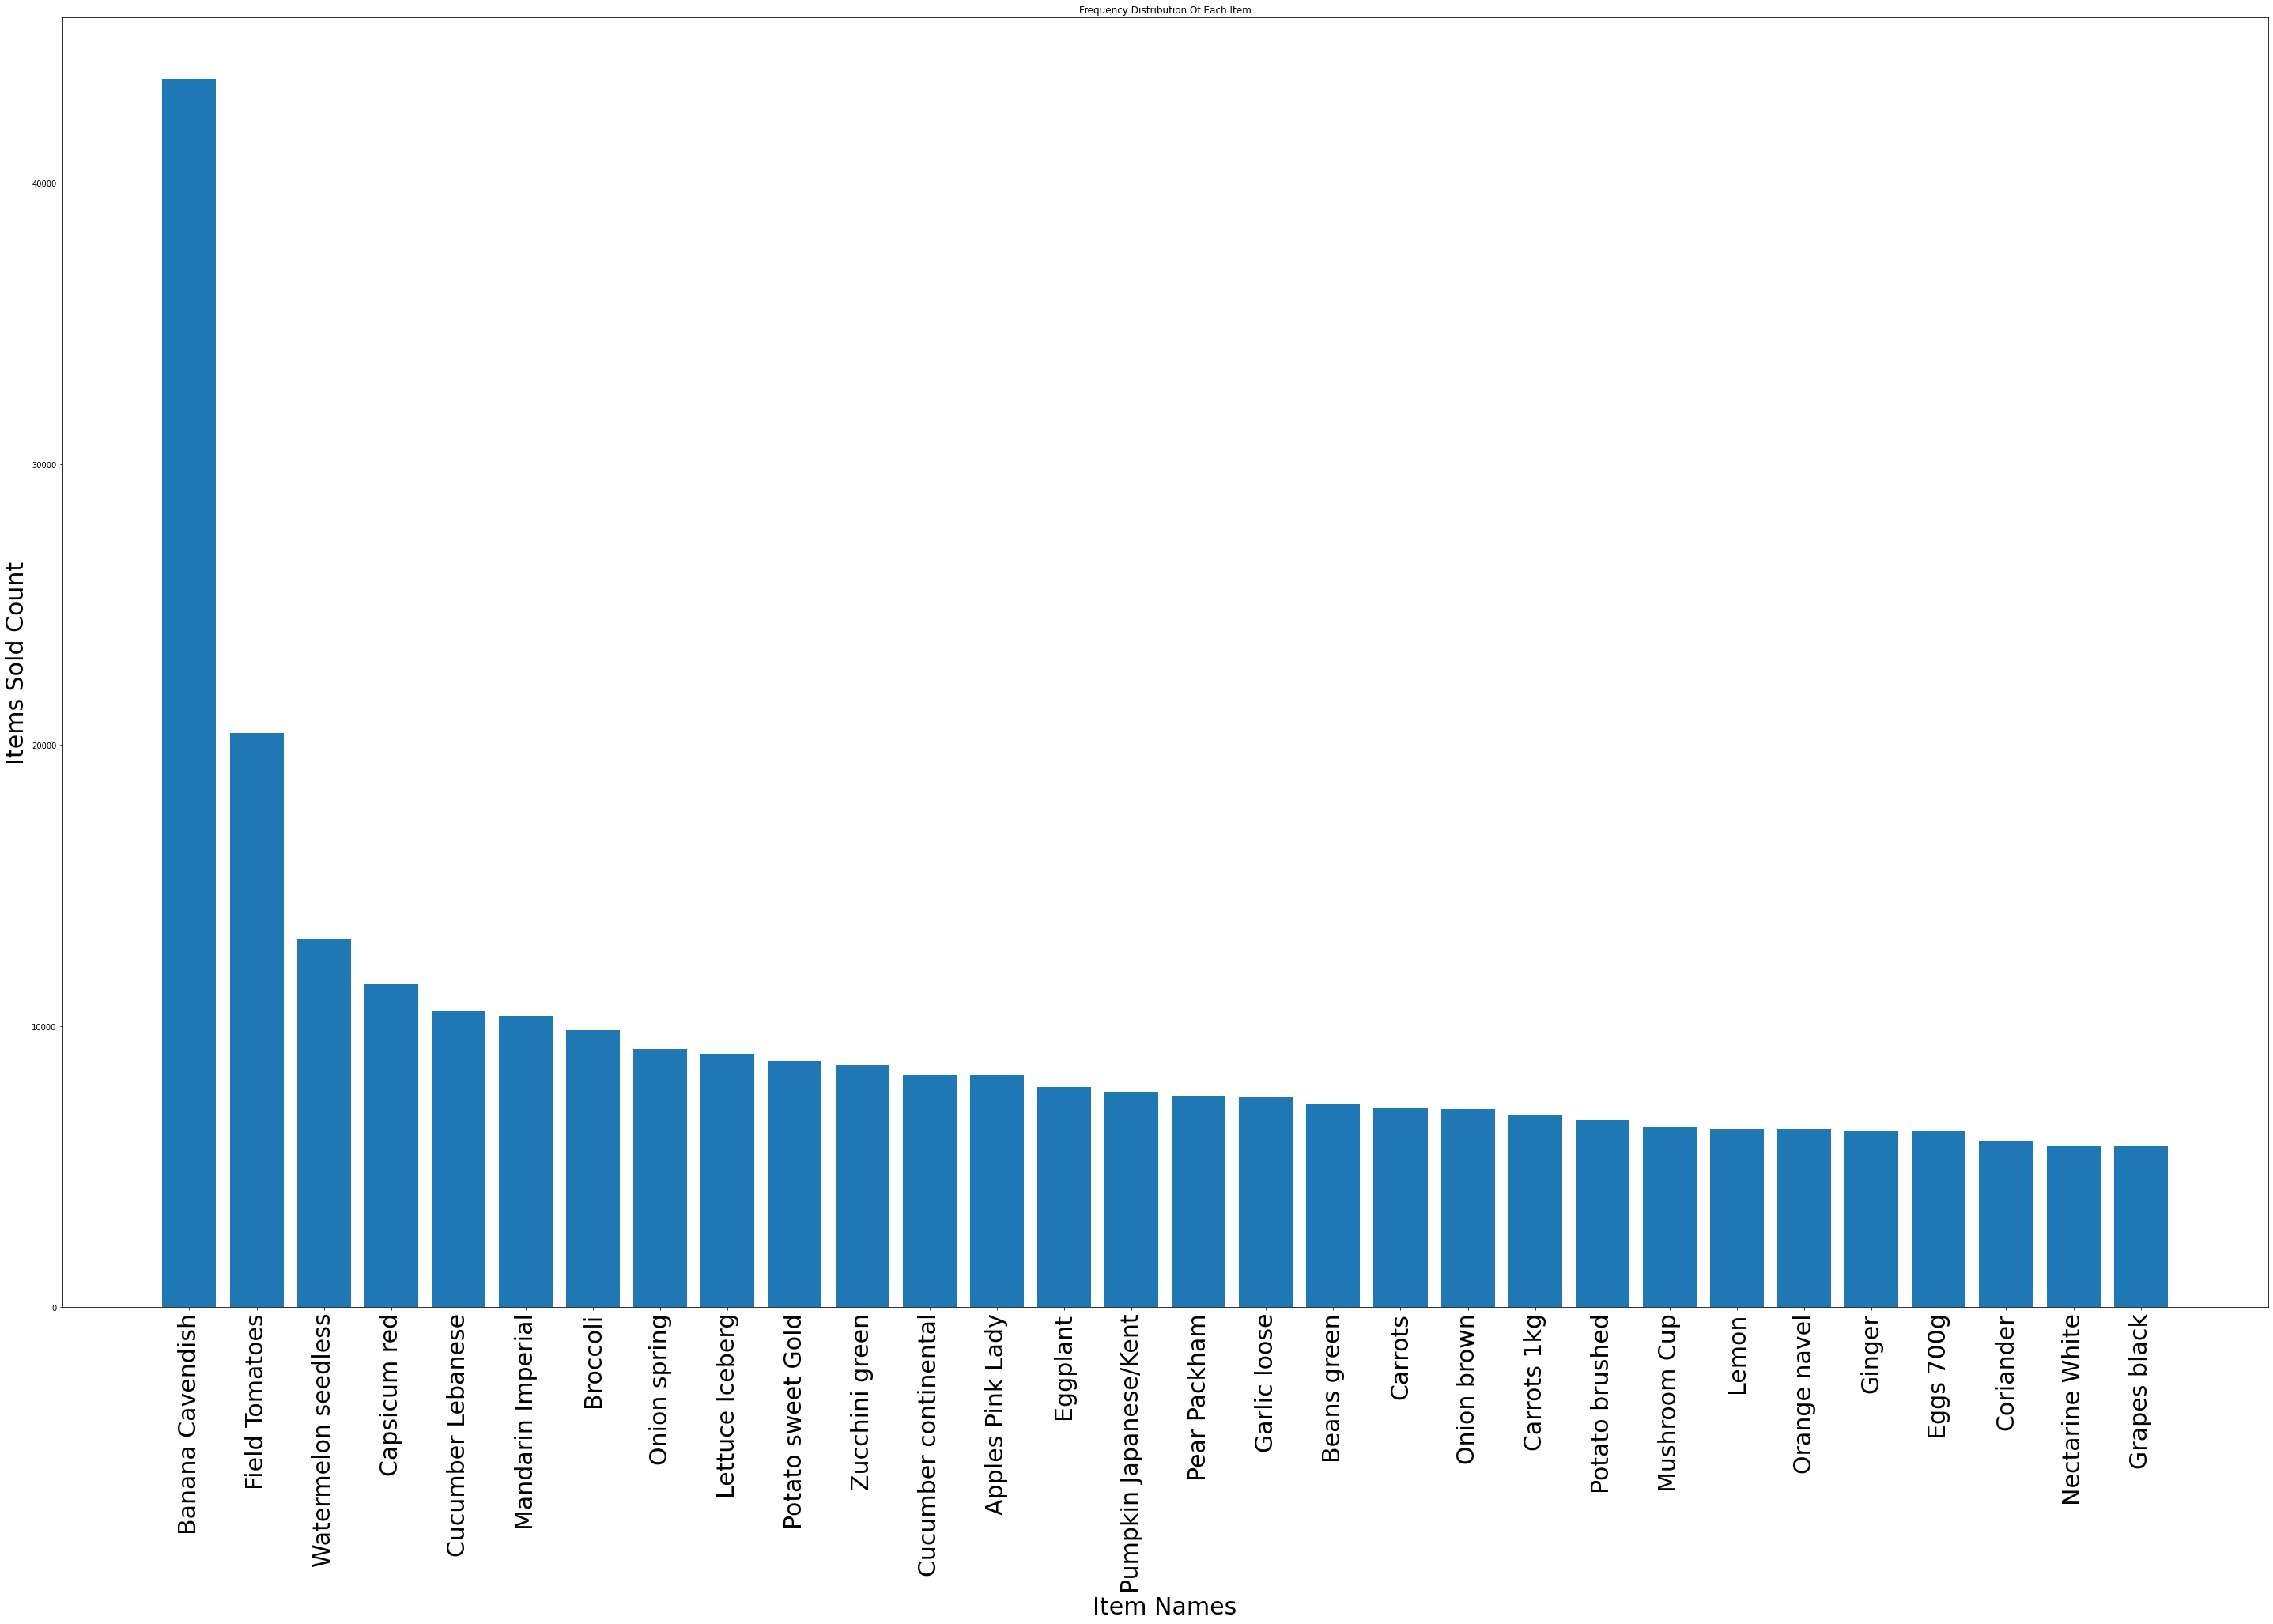

In [ ]:
data['NAME'] = data['NAME'].str.strip()
data['RECEIPT'] = data['RECEIPT'].astype('str')
data['UNITS'] = data["UNITS"].astype('float64')
data['UNITS'] = data["UNITS"].round(0)
data.head()

item_frequency = data['NAME'].value_counts()
item_frequency = pd.DataFrame(item_frequency)
print(item_frequency)

def plot_bar_x(data):
    plt.figure(1,figsize=(50,30))
    data=data.head(30)
    # this is for plotting purpose
    index = np.arange(len(data.index))
    plt.bar(index, data['NAME'])
    plt.xlabel('Item Names', fontsize=30)
    plt.ylabel('Items Sold Count', fontsize=30)
    plt.xticks(index, data.index, fontsize=30, rotation=90)
    plt.title('Frequency Distribution Of Each Item')
    plt.show()

plot_bar_x(item_frequency)

In [ ]:
a = data.groupby('NAME')['RECEIPT'].count().sort_values()

In [ ]:
a

NAME
Brown Sugar 1kg                     1
Kithul Jaggary 450g                 1
Derana white keeri samba 5kg        1
Mithas 5kg                          1
Purple Dutch Carrots                1
                                ...  
Cucumber Lebanese               10539
Capsicum red                    11493
Watermelon seedless             13128
Field Tomatoes                  20427
Banana Cavendish                43696
Name: RECEIPT, Length: 1265, dtype: int64

In [ ]:
a.mean()/181970

0.002863786998725629

In [ ]:
data.head()

,DATENEW,RECEIPT,NAME,UNITS
0,2016-03-16,d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9,Pumpkin Japanese/Kent,3.0
1,2016-03-16,d9ea23a9-8a1b-41b4-b554-2bf7e96ca2d9,Orange navel,0.0
2,2016-03-16,f4dd518d-1fd8-4339-abc6-2c5390c20e30,Orange navel,-1.0
3,2016-03-16,aa299de6-1332-48ba-bce9-de8cbb48741e,Australian Asparagus green,3.0
4,2016-03-16,aa299de6-1332-48ba-bce9-de8cbb48741e,Nice Munchee 200g,1.0


In [ ]:
basket = data.groupby(['RECEIPT', 'NAME'])['UNITS'].sum().unstack().reset_index().fillna(0).set_index("RECEIPT")
basket

NAME,1Lt Coconut Oil Ver,1Lt Coconut oil,1kg olive pack,2kg Marsh Grapefruit,2kg Royal gala apple,3kg Marsh Grapefruit,3kg Valencia Oranges,5kg Red onion,5kg brown Onion,Adelaide Tomatoes,Adzuki Beans 500g,Afourer Mandarin,Al Nakhil Tahina 454g,Alfa Alfa,Almond Bread,Almond Cresent 250g,Almonds Natural 500g,Almonds Roasted 375g,Amami Papadam,Ambarella,Ambarella Chutney dera,Amber Jewl plum,Amberella Curry,Ambulthiyal Mix LA,Annapura Atta 1kg,Apple & Blackcurrant Juice 350ml,Apple Granny Smith 1kg bag,Apple Granny smith 2kg Bags,Apple Jonathan,Apple Juice 350ml,Apple Rings 500g,Apple pink lady 1kg Punnet,Apples Fuji,Apples Golden Delicious,Apples Granny Smith,Apples Pink Lady,Apples Red Delicious,Apples Royal Gala,Apricot Dried 500g,Apricots,...,egg free range 600g,eggs 800g,fish curry mix 375g,fried bread chips sweet 200g,grapes Calmeria,grapes sulthana,king coconut water,kiwi fruit Gold,kiwifruit multibuy 5 for $2,kohlrabi,kottu mee chicken 78g,mango 2for 3.00,mustatd Leaves 2for,navel oranges 3kg,onion brown 10kg,onion brown 2kg Small,onion brown 2kg large,onion red 2kg,peaches white,pear Bosc,pear corella,polos Mellum in Brine 560g,potato Red 4kg,potato dumplings 500g,potatoes Red 5kg,potatoes royal blue,red Split lentils 5kg,salted olives Black,sinhala Pickle 375g MD,spaghettini 03,tomato sweet cherry vine,tomatoes Grape,vanila powder 15g,wash potatoes 5kg,white Raw Rice 5kg Derana,wijaya chilli powder 500g,wijaya chinese Noodles,wijaya kurakkan Flour 400g,wombok half,ya pears
RECEIPT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000fbae-88c4-41ce-9f58-851a4595add4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000178df-39b5-49b1-948f-92d1501c29d2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001c063-2d32-4380-9db6-de20c5b48f59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001c2b6-9d89-4355-84e3-41269c0e82e6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001cbed-b03b-43c8-8957-3bb40fcb33a6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffeeb0f-fd79-4732-ac7f-76f29a95abf5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x > 0:
        return 1
    if x=='nan':
        return 0

basket_sets = basket.applymap(encode_units)
# basket_sets

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.002, use_colnames=True)
print(frequent_itemsets)

      support                                           itemsets
0    0.010238                             (3kg Valencia Oranges)
1    0.003742                                 (Afourer Mandarin)
2    0.019745                                      (Apples Fuji)
3    0.004940                          (Apples Golden Delicious)
4    0.021855                              (Apples Granny Smith)
..        ...                                                ...
401  0.002033    (Carrots 1kg, Banana Cavendish, Field Tomatoes)
402  0.002248  (Cucumber continental, Banana Cavendish, Field...
403  0.002066  (Cucumber continental, Banana Cavendish, Lettu...
404  0.002286  (Watermelon seedless, Banana Cavendish, Field ...
405  0.002094  (Mandarin Imperial, Banana Cavendish, Pear Pac...

[406 rows x 2 columns]


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = pd.DataFrame(rules)
rules = rules.sort_values(['lift'])
rules = rules[(rules['lift'] >= 3)]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
407,(Carrots 1kg),"(Banana Cavendish, Field Tomatoes)",0.037567,0.017536,0.002033,0.054125,3.086545,0.001375,1.038683
406,"(Banana Cavendish, Field Tomatoes)",(Carrots 1kg),0.017536,0.037567,0.002033,0.115951,3.086545,0.001375,1.088665
187,(Celery half),(Carrots 1kg),0.017151,0.037567,0.002044,0.119193,3.172831,0.001400,1.092672
186,(Carrots 1kg),(Celery half),0.037567,0.017151,0.002044,0.054418,3.172831,0.001400,1.039411
390,(Pumpkin Japanese/Kent),(Potato sweet Gold),0.040281,0.029675,0.003814,0.094679,3.190520,0.002618,1.071802
391,(Potato sweet Gold),(Pumpkin Japanese/Kent),0.029675,0.040281,0.003814,0.128519,3.190520,0.002618,1.101250
332,(onion red 2kg),(Field Tomatoes),0.010623,0.064302,0.002182,0.205380,3.194004,0.001499,1.177542
333,(Field Tomatoes),(onion red 2kg),0.064302,0.010623,0.002182,0.033929,3.194004,0.001499,1.024125
25,(Pear Packham),(Apples Pink Lady),0.034934,0.036374,0.004177,0.119553,3.286766,0.002906,1.094474
24,(Apples Pink Lady),(Pear Packham),0.036374,0.034934,0.004177,0.114821,3.286766,0.002906,1.090249
